# **🍽️ Restaurant Tips Analysis**

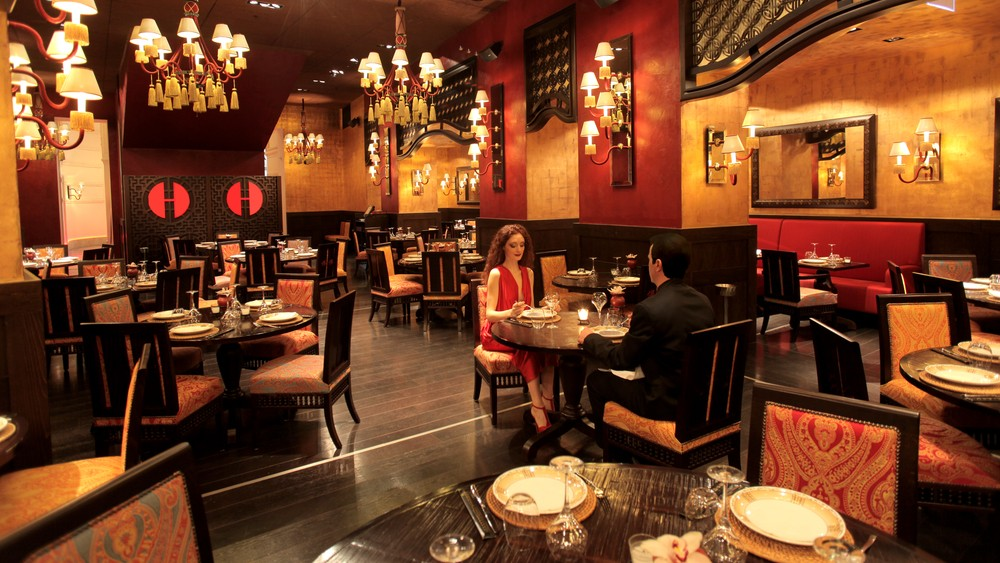

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt


Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
url = 'https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv'
df = pd.read_csv(url)

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [3]:
# PUT YOUR CODE HERE
df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [4]:
# PUT YOUR CODE HERE
df.dtypes

,0
id,int64
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


> **Ooops... 🤔**
>
> We have string columns considered as objects.

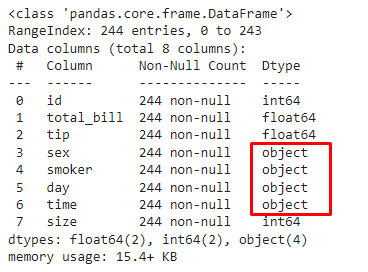

Let's fix their types and make them string:

In [24]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [31]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [37]:
# PUT YOUR CODE HERE
smokers_df = df[df.smoker=='Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [38]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
106,106,20.49,4.06,Male,Yes,Sat,Dinner,2
198,198,13.0,2.0,Female,Yes,Thur,Lunch,2
234,234,15.53,3.0,Male,Yes,Sat,Dinner,2
178,178,9.6,4.0,Female,Yes,Sun,Dinner,2
101,101,15.38,3.0,Female,Yes,Fri,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [39]:
# PUT YOUR CODE HERE
non_smokers_df = df[df.smoker=='No']

Check whether everything is okay. Output a test sample (5 random rows):

In [41]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
13,13,18.43,3.0,Male,No,Sun,Dinner,4
157,157,25.0,3.75,Female,No,Sun,Dinner,4
51,51,10.29,2.6,Female,No,Sun,Dinner,2
77,77,27.2,4.0,Male,No,Thur,Lunch,4
117,117,10.65,1.5,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [42]:
# YOUR CODE
common_tip_min = df.tip.min()
common_tip_max = df.tip.max()
common_tip_mean = df.tip.mean()
common_tip_median = df.tip.median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [43]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [44]:
# YOUR CODE
smokers_tip_min = smokers_df.tip.min()
smokers_tip_max = smokers_df.tip.max()
smokers_tip_mean = smokers_df.tip.mean()
smokers_tip_median = smokers_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [45]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [46]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df.tip.min()
non_smokers_tip_max = non_smokers_df.tip.max()
non_smokers_tip_mean = non_smokers_df.tip.mean()
non_smokers_tip_median = non_smokers_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [47]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [48]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

*1*. On average, smokers tip very slightly more than non-smokers, but the difference is negligible \(less than $0.02\).

*2*. The median tip for smokers is \$3.00, while for non-smokers is \$2.74. This suggests that half of the smokers tip \$3 or more, while half of the non-smokers tip less than \$2.74, indicating that smokers tend to give slightly higher tips.

**General conclusion:**

While the mean and range for tip amounts are fairly similar between smokers and non-smokers, the median shows a clearer trend: smokers tend to tip slightly more frequently in higher amounts compared to non-smokers. However, the overall difference in tipping behavior between the two groups is minimal.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

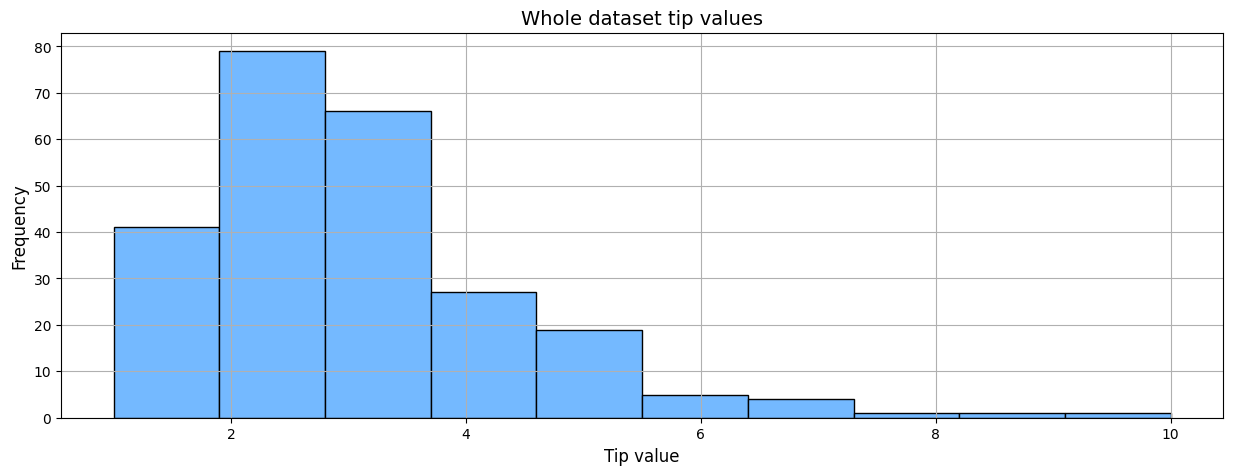

In [49]:
# YOUR CODE
# Create the histogram
plt.figure(figsize=(15, 5))
plt.hist(df.tip, bins=10, color='#74b9ff', edgecolor='black')

# Add labels and title
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Whole dataset tip values', fontsize=14)

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

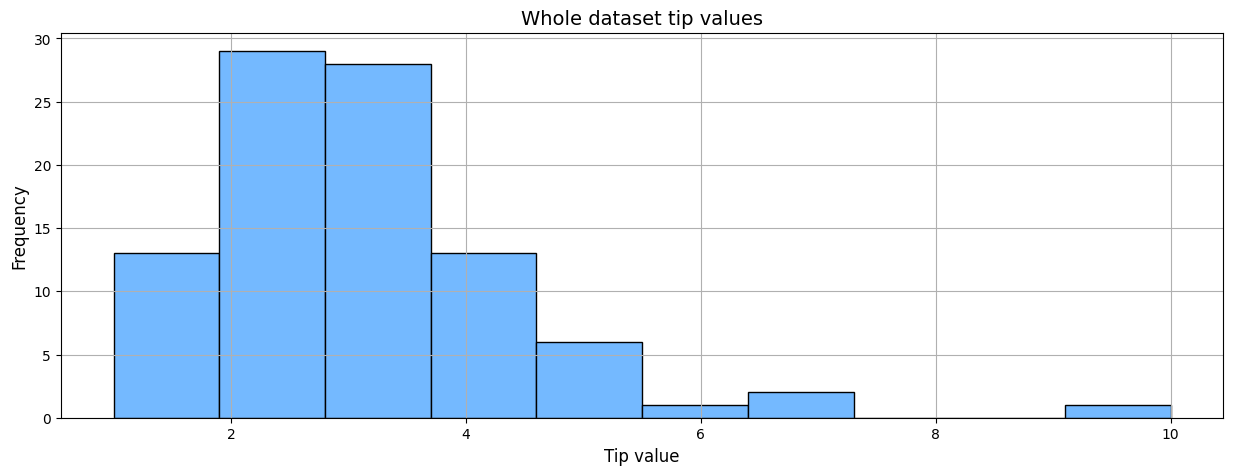

In [50]:
# YOUR CODE
# Create the histogram
plt.figure(figsize=(15, 5))
plt.hist(smokers_df.tip, bins=10, color='#74b9ff', edgecolor='black')

# Add labels and title
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Whole dataset tip values', fontsize=14)

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

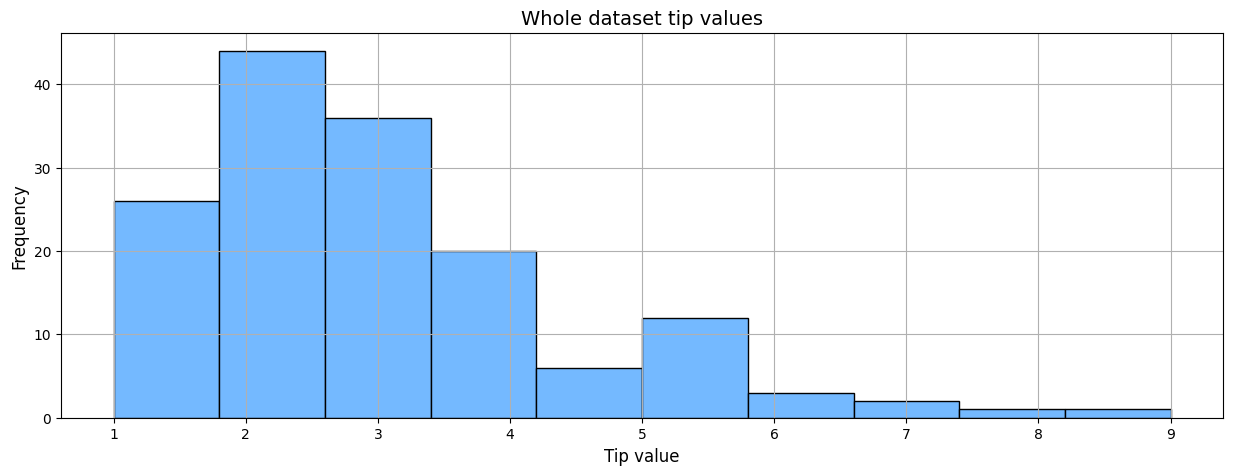

In [51]:
# YOUR CODE
# Create the histogram
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df.tip, bins=10, color='#74b9ff', edgecolor='black')

# Add labels and title
plt.xlabel('Tip value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Whole dataset tip values', fontsize=14)

# Show gridlines
plt.grid(True)

# Display the plot
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

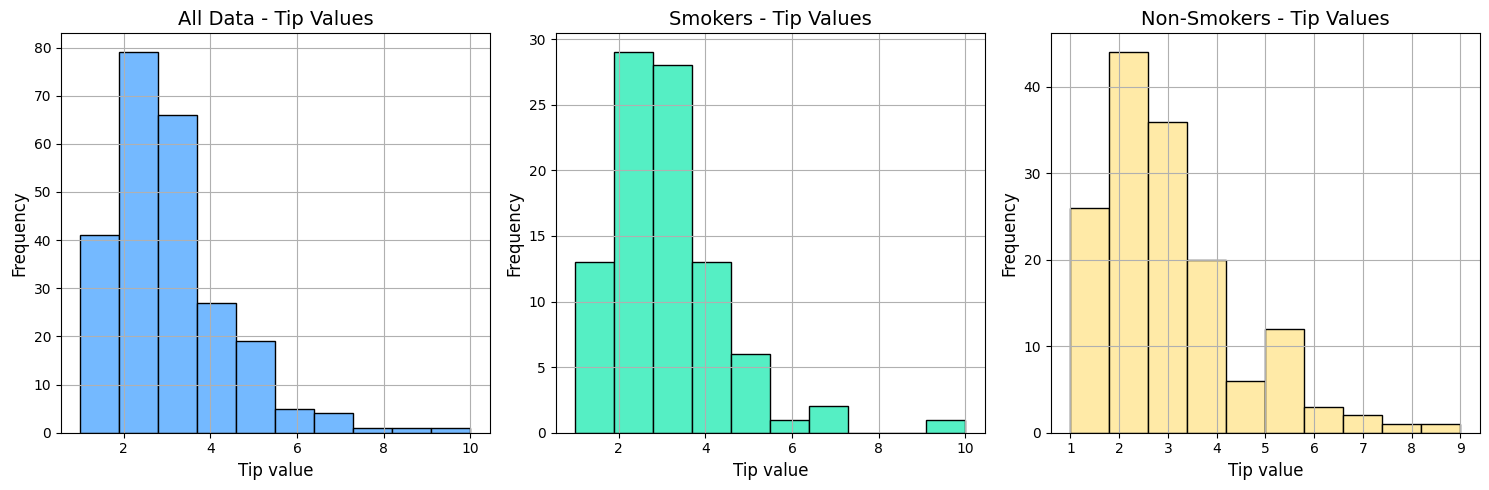

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for df
axs[0].hist(df['tip'], bins=10, color='#74b9ff', edgecolor='black')
axs[0].set_xlabel('Tip value', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('All Data - Tip Values', fontsize=14)
axs[0].grid(True)

# Plot histogram for smokers_df
axs[1].hist(smokers_df['tip'], bins=10, color='#55efc4', edgecolor='black')
axs[1].set_xlabel('Tip value', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].set_title('Smokers - Tip Values', fontsize=14)
axs[1].grid(True)

# Plot histogram for non_smokers_df
axs[2].hist(non_smokers_df['tip'], bins=10, color='#ffeaa7', edgecolor='black')
axs[2].set_xlabel('Tip value', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)
axs[2].set_title('Non-Smokers - Tip Values', fontsize=14)
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Most of the customers' tip is in about \$4 or less (mostly \$2 - \$3), regardless of whether they are smokers or not. Only few of them tip more than \$5.

**General conclusion:**
There is not much difference in tips between the non-smokers and smokers, the change is minimal and not significant.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [55]:
male_df = df[df.sex=='Male']
female_df = df[df.sex=='Female']

In [57]:
# YOUR CODE
male_tip_max = male_df.tip.max()
male_tip_min = male_df.tip.min()
male_tip_mean = male_df.tip.mean()
male_tip_median = male_df.tip.median()

In [58]:
# YOUR CODE
female_tip_max = female_df.tip.max()
female_tip_min = female_df.tip.min()
female_tip_mean = female_df.tip.mean()
female_tip_median = female_df.tip.median()

In [59]:
# YOUR CODE
# Make a list of values
male_values = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
# Round all the values to 4 decimal places
male_values = map(lambda x: round(x, 4), male_values)

# Make a dataframe from the list
male_mct = pd.DataFrame(male_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


In [60]:
# YOUR CODE
# Make a list of values
female_values = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
# Round all the values to 4 decimal places
female_values = map(lambda x: round(x, 4), female_values)

# Make a dataframe from the list
female_mct = pd.DataFrame(female_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


In [61]:
sex_all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Male': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median},
    'Female': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median}
}

# Make a dataframe
sex_all_mct = pd.DataFrame(sex_all_vals_dict)
# Output the dataframe
sex_all_mct

,Common,Male,Female
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


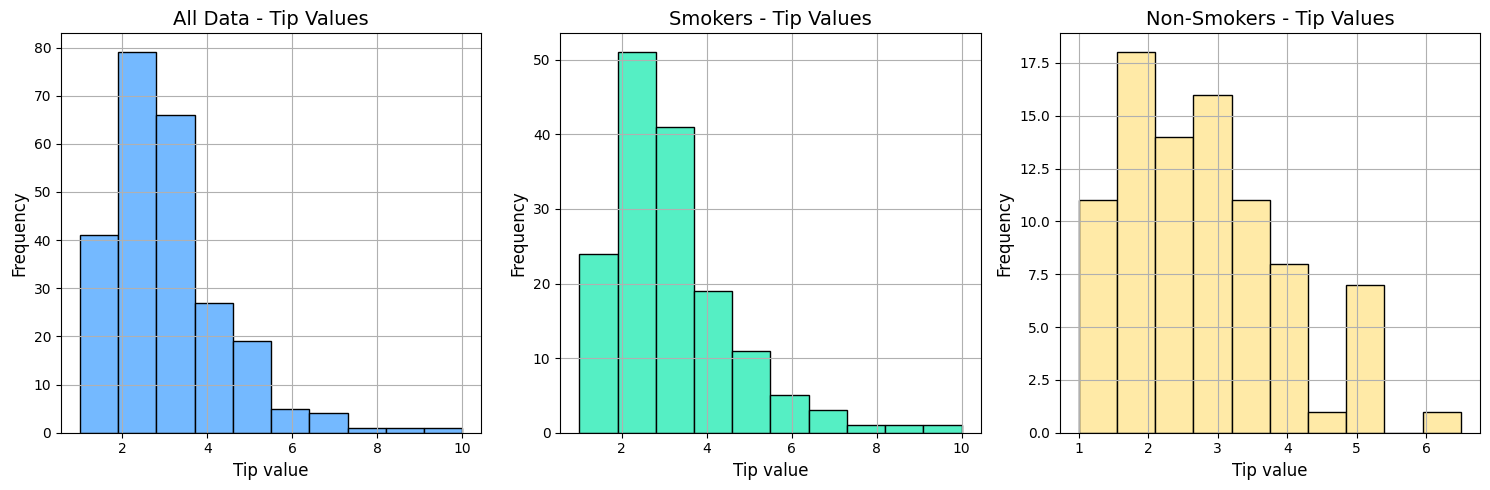

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for df
axs[0].hist(df['tip'], bins=10, color='#74b9ff', edgecolor='black')
axs[0].set_xlabel('Tip value', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('All Data - Tip Values', fontsize=14)
axs[0].grid(True)

# Plot histogram for male_df
axs[1].hist(male_df['tip'], bins=10, color='#55efc4', edgecolor='black')
axs[1].set_xlabel('Tip value', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].set_title('Smokers - Tip Values', fontsize=14)
axs[1].grid(True)

# Plot histogram for female_df
axs[2].hist(female_df['tip'], bins=10, color='#ffeaa7', edgecolor='black')
axs[2].set_xlabel('Tip value', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)
axs[2].set_title('Non-Smokers - Tip Values', fontsize=14)
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Conclusion**

The average and median of the tips difference is minimal, but the male customers is the only gender willing to pay more than \$6 on tips.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [63]:
weekend_df = df[df['day'].isin(['Sat', 'Sun'])]
weekday_df = df[~df['day'].isin(['Sat', 'Sun'])]

In [64]:
# Calculate statistics for weekends
weekend_tip_max = weekend_df.tip.max()
weekend_tip_min = weekend_df.tip.min()
weekend_tip_mean = weekend_df.tip.mean()
weekend_tip_median = weekend_df.tip.median()

# Calculate statistics for weekdays
weekday_tip_max = weekday_df.tip.max()
weekday_tip_min = weekday_df.tip.min()
weekday_tip_mean = weekday_df.tip.mean()
weekday_tip_median = weekday_df.tip.median()

In [65]:
# Make a list of values for weekends
weekend_values = [weekend_tip_min, weekend_tip_max, weekend_tip_mean, weekend_tip_median]
# Round all the values to 4 decimal places
weekend_values = list(map(lambda x: round(x, 4), weekend_values))

# Make a dataframe from the list
weekend_mct = pd.DataFrame(weekend_values, index=['min', 'max', 'mean', 'median'])
print("Weekend Tip Statistics:")
print(weekend_mct)

# Make a list of values for weekdays
weekday_values = [weekday_tip_min, weekday_tip_max, weekday_tip_mean, weekday_tip_median]
# Round all the values to 4 decimal places
weekday_values = list(map(lambda x: round(x, 4), weekday_values))

# Make a dataframe from the list
weekday_mct = pd.DataFrame(weekday_values, index=['min', 'max', 'mean', 'median'])
print("\nWeekday Tip Statistics:")
print(weekday_mct)

Weekend Tip Statistics:
              0
min      1.0000
max     10.0000
mean     3.1153
median   3.0000

Weekday Tip Statistics:
             0
min     1.0000
max     6.7000
mean    2.7628
median  2.5000


In [66]:
# Create a dictionary for all values
time_all_vals_dict = {
    'Weekdays': {'min': weekday_tip_min, 'max': weekday_tip_max, 'mean': weekday_tip_mean, 'median': weekday_tip_median},
    'Weekends': {'min': weekend_tip_min, 'max': weekend_tip_max, 'mean': weekend_tip_mean, 'median': weekend_tip_median}
}

# Make a dataframe
time_all_mct = pd.DataFrame(time_all_vals_dict)
print("\nAll Time Statistics:")
print(time_all_mct)


All Time Statistics:
        Weekdays   Weekends
min      1.00000   1.000000
max      6.70000  10.000000
mean     2.76284   3.115276
median   2.50000   3.000000


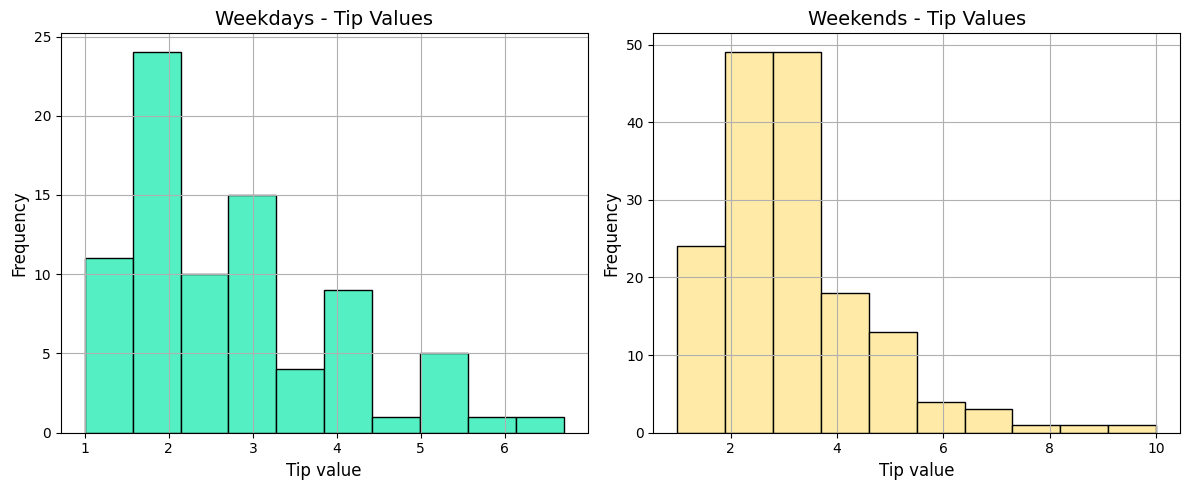

In [67]:
# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for weekdays
axs[0].hist(weekday_df['tip'], bins=10, color='#55efc4', edgecolor='black')
axs[0].set_xlabel('Tip value', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('Weekdays - Tip Values', fontsize=14)
axs[0].grid(True)

# Plot histogram for weekends
axs[1].hist(weekend_df['tip'], bins=10, color='#ffeaa7', edgecolor='black')
axs[1].set_xlabel('Tip value', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].set_title('Weekends - Tip Values', fontsize=14)
axs[1].grid(True)

# Adjust layout
plt.tight_layout()


**Conclusion:**

The average tips is 12% higher on weekends to weekdays, the tip's median is 20% higher on weekends.
Also customers are willing to pay higher tips on weekends.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

Dinner Tip Statistics:
              0
min      1.0000
max     10.0000
mean     3.1027
median   3.0000

Other Meals Tip Statistics:
             0
min     1.2500
max     6.7000
mean    2.7281
median  2.2500

All Meal Statistics:
         Dinners  Other Meals
min      1.00000     1.250000
max     10.00000     6.700000
mean     3.10267     2.728088
median   3.00000     2.250000


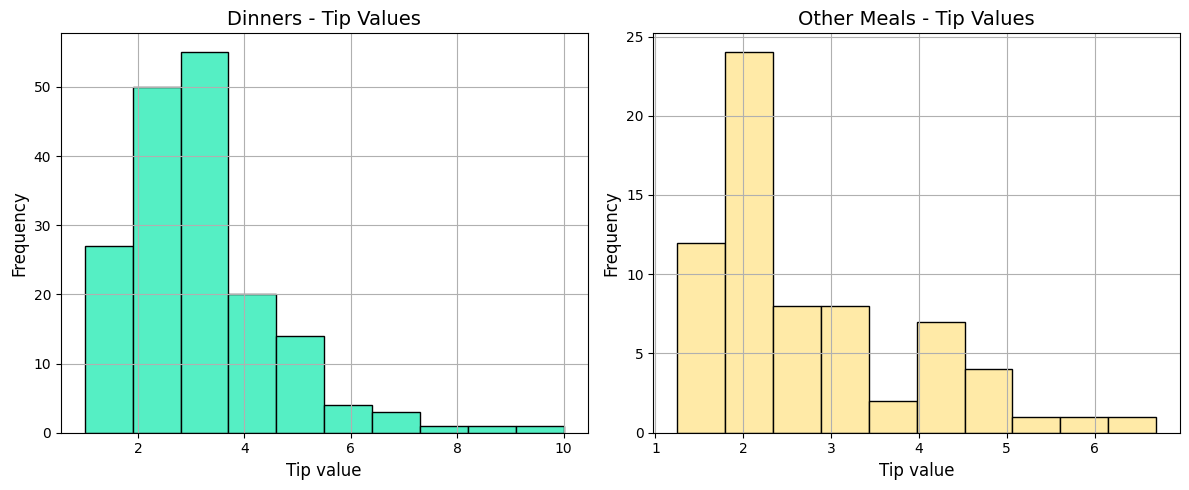

In [68]:
# Separate data for dinners and other meals
dinner_df = df[df['time'] == 'Dinner']
other_meal_df = df[df['time'] != 'Dinner']

# Calculate statistics for dinners
dinner_tip_max = dinner_df.tip.max()
dinner_tip_min = dinner_df.tip.min()
dinner_tip_mean = dinner_df.tip.mean()
dinner_tip_median = dinner_df.tip.median()

# Calculate statistics for other meals
other_meal_tip_max = other_meal_df.tip.max()
other_meal_tip_min = other_meal_df.tip.min()
other_meal_tip_mean = other_meal_df.tip.mean()
other_meal_tip_median = other_meal_df.tip.median()

# Make a list of values for dinners
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
# Round all the values to 4 decimal places
dinner_values = list(map(lambda x: round(x, 4), dinner_values))

# Make a dataframe from the list
dinner_mct = pd.DataFrame(dinner_values, index=['min', 'max', 'mean', 'median'])
print("Dinner Tip Statistics:")
print(dinner_mct)

# Make a list of values for other meals
other_meal_values = [other_meal_tip_min, other_meal_tip_max, other_meal_tip_mean, other_meal_tip_median]
# Round all the values to 4 decimal places
other_meal_values = list(map(lambda x: round(x, 4), other_meal_values))

# Make a dataframe from the list
other_meal_mct = pd.DataFrame(other_meal_values, index=['min', 'max', 'mean', 'median'])
print("\nOther Meals Tip Statistics:")
print(other_meal_mct)

# Create a dictionary for all values
meal_all_vals_dict = {
    'Dinners': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Other Meals': {'min': other_meal_tip_min, 'max': other_meal_tip_max, 'mean': other_meal_tip_mean, 'median': other_meal_tip_median}
}

# Make a dataframe
meal_all_mct = pd.DataFrame(meal_all_vals_dict)
print("\nAll Meal Statistics:")
print(meal_all_mct)

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for dinners
axs[0].hist(dinner_df['tip'], bins=10, color='#55efc4', edgecolor='black')
axs[0].set_xlabel('Tip value', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('Dinners - Tip Values', fontsize=14)
axs[0].grid(True)

# Plot histogram for other meals
axs[1].hist(other_meal_df['tip'], bins=10, color='#ffeaa7', edgecolor='black')
axs[1].set_xlabel('Tip value', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].set_title('Other Meals - Tip Values', fontsize=14)
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Conclusion:**

The average tips is 14% higher on dinners, the tip's median is 25% higher on dinners.
Also customers are willing to pay higher tips on dinners.